### Police Report Metrics  
An area with a smaller amount of police reports could imply that there are less crimes in the neighborhood. This means that it could be a safer area for walking around while you stare at your phone, unaware of your surroundings. A.K.A. Pokemon Go

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

#read in file
crimes = pd.read_csv("crime.csv")

create a dictionary for the crimes in all of the neighborhoods

In [4]:
#make dictionary
crimes_dict = dict()

#read through and add to dictionary
for row in range(len(crimes)):
    #get the neighborhood name
    name = crimes.loc[row, 'INCIDENTNEIGHBORHOOD']
    
    #if it's already in the dictionary:
    if name in crimes_dict:
        crimes_dict[name] += 1
    #if not set it equal to 1
    else:
        crimes_dict[name] = 1

#make it a series for sorting
num_crimes_series = pd.Series(crimes_dict, name = 'Neighborhoods')

#print
num_crimes_series.sort_values()[:]

Ridgemont                      1
Outside County                 1
Summer Hill                    2
Hays                           2
Swisshelm Park                 2
                            ... 
Brookline                     79
Mount Washington              96
Carrick                      105
South Side Flats             135
Central Business District    253
Name: Neighborhoods, Length: 94, dtype: int64

this is a lot of neighborhoods. let's look at the top ten least amount of crimes

In [3]:
num_crimes_series.sort_values()[:10]

Ridgemont         1
Outside County    1
Summer Hill       2
Hays              2
Swisshelm Park    2
Regent Square     2
Oakwood           2
East Carnegie     3
Outside State     3
Mount Oliver      4
Name: Neighborhoods, dtype: int64

Now let's make a bar graph to demonstrate this data

Text(0, 0.5, 'Total amount of reports')

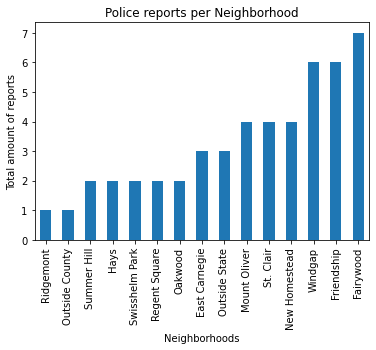

In [5]:
num_crimes_series.sort_values()[:15].plot.bar()
plt.title('Police reports per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of reports')

Let's take population into account

Text(0, 0.5, 'Total amount of reports/population')

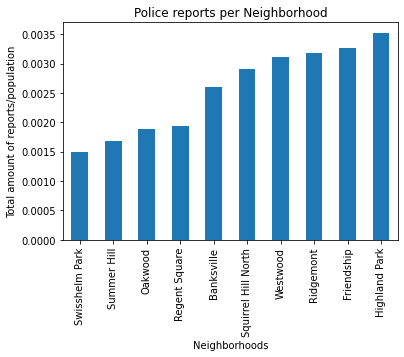

In [6]:
#read in file
pop = pd.read_csv("total-population.csv")

#read through and add to dictionary
for row in range(len(pop)):
    #get the neighborhood name
    name = pop.loc[row, 'Neighborhood']
    
    #if it's already in the dictionary:
    if name in crimes_dict:
        crime_rate = crimes_dict[name]/pop.loc[row, 'Estimate; Total']
        crimes_dict[name] = crime_rate

#make it a series for sorting
pop_series = pd.Series(crimes_dict, name = 'Population of Neighborhoods')

#graph it
pop_series.sort_values()[:10].plot.bar()
plt.title('Police reports per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of reports/population')

Here we can see that when taking population into account and divide the number of crimes by the total population in each neighborhood, these are the areas with the lowest crime rates. **Swisshelm Park** is the winner